<a href="https://colab.research.google.com/github/rafaelblink/machine-learning/blob/main/aula-01-agrupamento-clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Definindo o número de clientes
num_clients = 1000

# Gerando dados simulados
np.random.seed(42)

# Quantidade de compras (aleatório entre 1 e 50)
quantidade_compras = np.random.randint(1, 51, num_clients)

# Valor gasto (aleatório entre 10 e 2000 reais)
valor_gasto = np.random.uniform(10, 2000, num_clients)

# Frequência de compra (número de compras por mês, entre 1 e 20)
frequencia_compra = np.random.randint(1, 21, num_clients)

# Criando o DataFrame
df = pd.DataFrame({
    'cliente_id': [f'Cliente_{i+1}' for i in range(num_clients)],
    'quantidade_compras': quantidade_compras,
    'valor_gasto': valor_gasto,
    'frequencia_compra': frequencia_compra
})

# Exibindo as primeiras linhas do DataFrame
df.head()

# Salvando o DataFrame em um arquivo CSV
df.to_csv('ecommerce_data.csv', index=False)

print("Base de dados 'ecommerce_data.csv' gerada com sucesso!")


Base de dados 'ecommerce_data.csv' gerada com sucesso!


In [3]:
df.head()

,cliente_id,quantidade_compras,valor_gasto,frequencia_compra
0,Cliente_1,39,1868.046729,11
1,Cliente_2,29,24.993383,15
2,Cliente_3,15,458.412267,5
3,Cliente_4,43,737.060071,20
4,Cliente_5,8,980.741504,10


In [4]:
# Carregar os dados
df = pd.read_csv('ecommerce_data.csv')

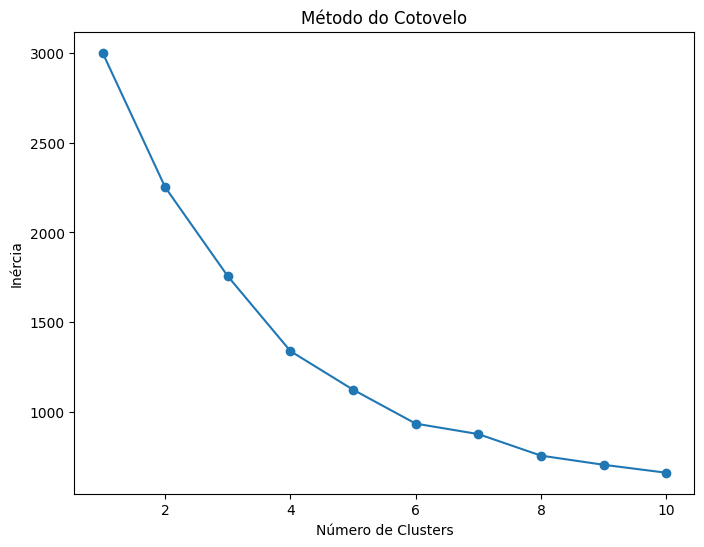

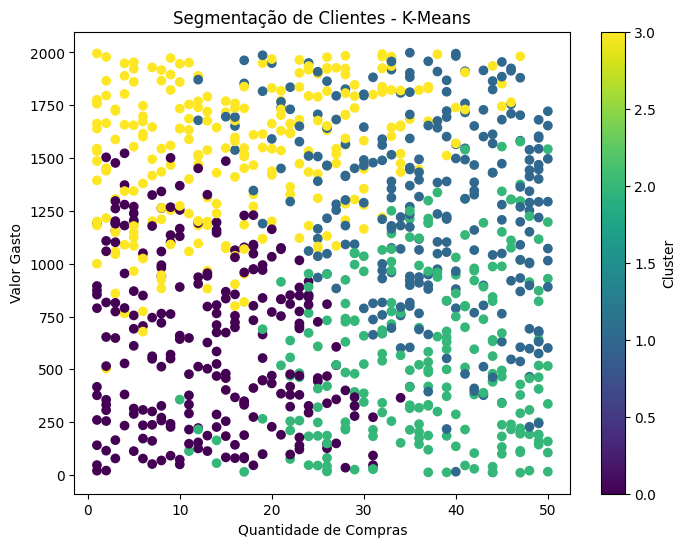

In [5]:
# Pré-processamento (ajuste conforme seu dataset)
df_clean = df[['quantidade_compras', 'valor_gasto', 'frequencia_compra']].dropna()
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_clean)

# Método do Cotovelo para encontrar o número ideal de clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do Cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

# Aplicando K-Means com o número ideal de clusters (exemplo: 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(data_scaled)

# Visualizar os clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['quantidade_compras'], df['valor_gasto'], c=df['cluster'], cmap='viridis')
plt.title('Segmentação de Clientes - K-Means')
plt.xlabel('Quantidade de Compras')
plt.ylabel('Valor Gasto')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
#Defini 4 clusters como ideal:
#Cluster 1: Baixo gasto e baixa frequência.
#Cluster 2: Alto gasto e baixa frequência.
#Cluster 3: Baixo gasto e alta frequência.
#Cluster 4: Alto gasto e alta frequência.
#Cada grupo permite estratégias específicas de marketing.